In [4]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-datasets/188282/420762/malaria-bounding-boxes.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1570163709&Signature=ibFn0YTJk7BrLbusS61Bc%2B59s4hJj1uc%2BUDUPAZdFdDqFejSU9zWcKcxOOwO4sNKe0RKN5RAYE7YAbv%2B0t10ONIATp0xW3qoW0xFiczUxV7f0ZqYomGAapkZ%2Fv6uYQLx2RYoUxvm%2BxXb6JL1jEdfH7axcmdUO3jFNbr307xIDauDOfgd4xkVWVrwo7SKnjOsA4E3at6qImcEQje9ct8etDZm9KEtXbNx3kud0BFz8Zmj4cRxgiic6zpU6apl%2FltoSLUWUDUmNcG4XX5Uiy9t57sYdZ4dt0ZJ9SAUWC6tejfCb5mu6uD5XRIBtdA5DwgxONm1QngYun1WiM2yLHxU4g%3D%3D" -O "CurlWget597" -c

--2019-10-03 07:18:16--  https://storage.googleapis.com/kaggle-datasets/188282/420762/malaria-bounding-boxes.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1570163709&Signature=ibFn0YTJk7BrLbusS61Bc%2B59s4hJj1uc%2BUDUPAZdFdDqFejSU9zWcKcxOOwO4sNKe0RKN5RAYE7YAbv%2B0t10ONIATp0xW3qoW0xFiczUxV7f0ZqYomGAapkZ%2Fv6uYQLx2RYoUxvm%2BxXb6JL1jEdfH7axcmdUO3jFNbr307xIDauDOfgd4xkVWVrwo7SKnjOsA4E3at6qImcEQje9ct8etDZm9KEtXbNx3kud0BFz8Zmj4cRxgiic6zpU6apl%2FltoSLUWUDUmNcG4XX5Uiy9t57sYdZ4dt0ZJ9SAUWC6tejfCb5mu6uD5XRIBtdA5DwgxONm1QngYun1WiM2yLHxU4g%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.184.128, 2a00:1450:400c:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.184.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2259224287 (2.1G) [application/zip]
Saving to: ‘CurlWget597’

CurlWget597         100%[===================>]   2.10G  46.2MB/s    in 49s     

2019-10-03 07:19:06 (43.8 MB/s) - ‘CurlWg

In [0]:
!unzip CurlWget597

In [0]:
import json
training_json = '/content/malaria/training.json'

with open(training_json) as file:
       file.seek(0)
       train_data = json.load(file)

In [0]:
train_data

In [0]:
class_dict = {'red blood cell': 0, 'trophozoite': 1, 'schizont': 2, 'difficult': 3, 'ring': 4, 'leukocyte': 5, 'gametocyte': 6}

In [0]:
train_data_=[]
for i in train_data:
  path = 'malaria'+i['image']['pathname']
  for j in i['objects']:
    category = j['category']
    bounding_box = j['bounding_box']
    line = bounding_box['maximum']['c'],bounding_box['maximum']['r'],bounding_box['minimum']['c'],bounding_box['minimum']['r'],class_dict[category],path
    train_data_.append(line)

In [0]:
train_data_

In [0]:
import csv
headers = [ 'minimum_c', 'minimum_r', 'maximum_c','maximum_r', 'category','path']
with open('train.csv', 'w') as f:
        wr = csv.writer(f, quoting=csv.QUOTE_ALL)
        wr.writerow(headers)
        wr.writerows(train_data_)

In [12]:
import pandas as pd
train_df=pd.read_csv('train.csv')
train_df.head(2)

,minimum_c,minimum_r,maximum_c,maximum_r,category,path
0,1540,1158,1440,1057,0,malaria/images/8d02117d-6c71-4e47-b50a-6cc8d5e...
1,1403,971,1303,868,0,malaria/images/8d02117d-6c71-4e47-b50a-6cc8d5e...


In [13]:
train_df.columns

Index(['minimum_c', 'minimum_r', 'maximum_c', 'maximum_r', 'category', 'path'], dtype='object')

In [14]:
train_df['category'].value_counts()

0    77420
1     1473
3      441
4      353
2      179
6      144
5      103
Name: category, dtype: int64

In [0]:
train_df['path'].value_counts()

In [16]:
train_df.shape

(80113, 6)

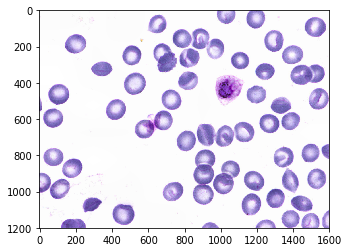

In [17]:
import matplotlib.pyplot as plt
from matplotlib import patches
image = plt.imread('/content/malaria/images/002f20ad-2ace-499c-9335-c9080bc3e6b5.png')
plt.imshow(image)
plt.show()

In [18]:
image.shape

(1200, 1600, 3)

In [0]:
train_df[train_df.path=="malaria/images/003a89b0-a095-417a-8dd6-f408339bbc68.png"]

In [0]:
for _,row in train_df[train_df.path=="malaria/images/003a89b0-a095-417a-8dd6-f408339bbc68.png"].iterrows():
    if row.category!='red blood cell':
      print(row)

Classification task : You are given an image with single object and you have to classify among different class , of which class it is from .<br>

CNN is used as a classifier to classify between the images.
So comes a point:<br>

If a image contains several objects .<br>

We have to detect the object which is far complex than classifying.<br>
Can we detect objects in a given figure using naive CNN ?<br>
The **ANSWER** is YES . <br>
How?<br>
Take a image divide it into grids .
Take any pre-trained model AlexNet,VGG take each grid and pass each grid into the model which can classified.

<br>**1.** This is Brute Force method there is another method which is very efficient It is Fast - RCNN (Regions with CNN)<br>
**2.** And Second is YOLO - You Only Look Once 




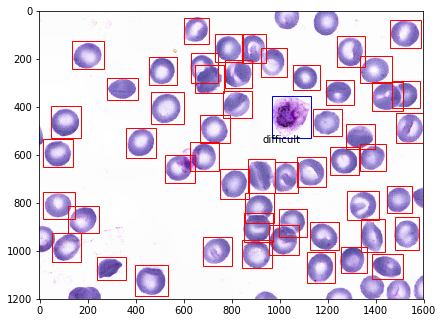

In [21]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

image = plt.imread('malaria/images/002f20ad-2ace-499c-9335-c9080bc3e6b5.png')
plt.imshow(image)


for _,row in train_df[train_df.path=="malaria/images/002f20ad-2ace-499c-9335-c9080bc3e6b5.png"].iterrows():
    xmin = row.minimum_c
    xmax = row.maximum_c
    ymin = row.minimum_r
    ymax = row.maximum_r
    
    l = xmax-xmin
    b = ymax-ymin
           
    if row.category==0:
      color='r'
      #ax.annotate('red blood cell',xy=(xmax-40,ymin+20))
    elif row.category==1:
      color='g'
      ax.annotate('trophozoite',xy=(xmax-40,ymin+20))
    elif row.category==3:
      color='b'
      ax.annotate('difficult',xy=(xmax-40,ymin+20))
    elif row.category==4:
      color='r'
      ax.annotate('ring',xy=(xmax-40,ymin+20))
    elif row.category==2:
      color='r'
      ax.annotate('schizont',xy=(xmax-40,ymin+20))
    elif row.category==6:
      color='o'
      ax.annotate('gametocyte',xy=(xmax-40,ymin+20))
    elif row.category==5:
      color='b'
      ax.annotate('leukocyte',xy=(xmax-40,ymin+20))
    
    
    rect = patches.Rectangle((xmin,ymin), l, b, edgecolor = color, facecolor = 'none')
    ax.add_patch(rect)
    

In [0]:
#!git clone https://github.com/dek8v5/Malaria_detection_with_Faster-RCNN_and_YOLOv3.git

In [23]:
train_df.columns

Index(['minimum_c', 'minimum_r', 'maximum_c', 'maximum_r', 'category', 'path'], dtype='object')

In [24]:
train_df.isnull().any()

minimum_c    False
minimum_r    False
maximum_c    False
maximum_r    False
category     False
path         False
dtype: bool

In [0]:
data = pd.DataFrame()
data['format'] = train_df['path']


for i in range(data.shape[0]):
    data['format'][i] = data['format'][i] + ',' + str(train_df['minimum_c'][i]) + ',' + str(train_df['minimum_r'][i]) + ',' + str(train_df['maximum_c'][i]) + ',' + str(train_df['maximum_r'][i]) + ',' + str(train_df['category'][i])

data.to_csv('annotate.txt', header=None, index=None, sep=' ')

In [0]:
!pip install -r /content/keras-frcnn/requirements.txt

In [0]:
!python /content/keras-frcnn/train_frcnn.py -o simple --num_epochs 2 -p annotate.txt

In [0]:
!python test_frcnn.py -p "/images/41be1bd3-0d31-4881-bf1f-3ccdfa21ff12.jpg"

Tried to create a bounding box on newly seen images FRCNN model is learning too slow this system

<h3> Classification

There are **4** Infected cell 'gametocyte', 'ring', 'difficult', 'schizont', 'trophozoite' and **2** uninfected cell 'red blood cell' and 'leukocyte'<br>
We divide it into Infected and Uninfected classfication problem <br>
Crop each cells from the actual image data (`80,000 cells`) . Each cell is labeled either **0** or **1** .<br>

**Metrics**<br>
As class is heavily imbalanced We will use F1- Score as a metric . First we will check with Random forest classifer and use a neural network to determine the score . 


In [29]:
Train_df.shape

(80113, 6)

In [30]:
train_df.head(2)

,minimum_c,minimum_r,maximum_c,maximum_r,category,path
0,1540,1158,1440,1057,0,malaria/images/8d02117d-6c71-4e47-b50a-6cc8d5e...
1,1403,971,1303,868,0,malaria/images/8d02117d-6c71-4e47-b50a-6cc8d5e...


In [31]:
train_df['category'].value_counts()

0    77420
1     1473
3      441
4      353
2      179
6      144
5      103
Name: category, dtype: int64

In [0]:
train_df.category[train_df.category == 5] = 0
train_df.category[train_df.category == 1] = 1
train_df.category[train_df.category == 2] = 1
train_df.category[train_df.category == 3] = 1
train_df.category[train_df.category == 4] = 1
train_df.category[train_df.category == 6] = 1

In [33]:
train_df['category'].value_counts()

0    77523
1     2590
Name: category, dtype: int64

In [0]:
train_df

In [0]:

%matplotlib inline
import cv2
import numpy as np
images=[]
for i,row in train_df.iterrows():
  #print(row['path'])
  image=plt.imread(row['path'])
  #print(image.shape)
  #print(image)
  #plt.imshow(image)
  r_min = row['maximum_r']
  c_min = row['maximum_c']
  r_max = row['minimum_r']
  c_max = row['minimum_c']
  obj_image = image[r_min:r_max, c_min:c_max]
  #print(obj_image.shape)
  
  obj_image = cv2.resize(obj_image, (32, 32), 0, 0, cv2.INTER_LINEAR)
  obj_image = obj_image.astype(np.float32)
  
  plt.show()
  #obj_image = np.multiply(obj_image, 1.0 / 255.0)
  #plt.imshow(obj_image)

  obj_image = obj_image.flatten()
  images.append(obj_image)

In [0]:
import pickle
with open('Fruits', 'wb') as fp:
  pickle.dump(images, fp)

In [0]:
import pickle 
with open('/content/drive/My Drive/Fruits', 'rb') as fp:
  images = pickle.load(fp)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, train_df['category'], test_size=0.2, random_state=41)

In [0]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=120)

rf.fit(X_train, y_train)

y_pred_test = rf.predict(X_test)

We woul take metrics as F1 score as class is heavily imbalanced

In [39]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred_test, average='macro'))

0.7157014301804683


In [0]:
pickle.dump(rf, open('BBmodel', 'wb'))

In [44]:
len(images[0])

3072



<h3 >Deep Learning model

In [45]:
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


Using TensorFlow backend.


In [0]:

#https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
from keras import backend as K
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [67]:
model = Sequential()
model.add(Convolution2D(32,3,3,input_shape=(32,32,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides = 2))
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy',f1_m])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu")`
  


In [50]:
len(images[0]),len(images)

(3072, 80113)

In [0]:
img = np.asarray(images).reshape(80113,32,32,3)

In [58]:
img.shape

(80113, 32, 32, 3)

In [69]:
model.fit(x=img,y=train_df['category'],batch_size=32,epochs=10,validation_split=0.3)

Train on 56079 samples, validate on 24034 samples
Epoch 1/10
56079/56079 [==============================] - 18s 315us/step - loss: 0.0324 - acc: 0.9912 - f1_m: 0.4824 - val_loss: 0.0337 - val_acc: 0.9918 - val_f1_m: 0.5528
Epoch 2/10
56079/56079 [==============================] - 18s 315us/step - loss: 0.0262 - acc: 0.9927 - f1_m: 0.5104 - val_loss: 0.0285 - val_acc: 0.9911 - val_f1_m: 0.6008
Epoch 3/10
56079/56079 [==============================] - 18s 314us/step - loss: 0.0202 - acc: 0.9943 - f1_m: 0.5333 - val_loss: 0.0510 - val_acc: 0.9864 - val_f1_m: 0.4651
Epoch 4/10
56079/56079 [==============================] - 18s 315us/step - loss: 0.0178 - acc: 0.9947 - f1_m: 0.5326 - val_loss: 0.0334 - val_acc: 0.9895 - val_f1_m: 0.5376
Epoch 5/10
56079/56079 [==============================] - 18s 313us/step - loss: 0.0153 - acc: 0.9954 - f1_m: 0.5466 - val_loss: 0.0322 - val_acc: 0.9905 - val_f1_m: 0.5866
Epoch 6/10
56079/56079 [==============================] - 18s 316us/step - loss: 0.01